In [49]:
# to install scikit-image, use
# "conda install scikit-image" or
# "pip install -U scikit-image"
import cv2
import matplotlib.pyplot as plt
import numpy as np
from multi_otsu_thresholding import *
from skimage.filters import (threshold_sauvola)

In [50]:
def extract_parchment(image_path, grey_thre):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    output_image = np.array(image, copy=True)  
    
    # set dark grey to black
    ret, thresh_image = cv2.threshold(image, grey_thre, 255, cv2.THRESH_TOZERO)
    thresh_image = cv2.GaussianBlur(thresh_image,(5,5),0)
    
    # closing
    kernel = np.ones((5,5),np.uint8)
    thresh_image = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel)
    
    # connected component
    n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh_image, 8, cv2.CV_32S)
    area = stats[:,4]
    
    # filter small components
    filtered_components = []
    threshold = 8000
    for i in range(len(area)):
        if(area[i] > threshold and not(stats[i][0] == 0 and stats[i][1] == 0)): # remove background component of (0, 0)
            filtered_components.append(i)
            
    # find best component
    height, width = thresh_image.shape
    biggest_area = 0
    best_component = 0    
    for component in filtered_components:
        if(area[component] > biggest_area):
            biggest_area = area[component]
            best_component = component 
            
    # Set selected component to white, everything else to black
    for i in range(height):
        for j in range(width):
            if(labels[i][j] == best_component):
                thresh_image[i][j] = 255
            else:
                thresh_image[i][j] = 0
                output_image[i][j] = 0
                
                
    # closing again
    thresh_image = cv2.GaussianBlur(output_image,(5,5),0)
    kernel = np.ones((80,80),np.uint8)
    thresh_image = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel)
    dilation_kernel = np.ones((50,50),np.uint8)
    thresh_image = cv2.dilate(thresh_image,dilation_kernel,iterations = 1)
    # connected component
    n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh_image, 8, cv2.CV_32S)
    area = stats[:,4]
    
    # filter small components
    filtered_components = []
    threshold = 8000
    for i in range(len(area)):
        if(area[i] > threshold and not(stats[i][0] == 0 and stats[i][1] == 0)): # remove background component of (0, 0)
            filtered_components.append(i)
            
    # find best component
    height, width = thresh_image.shape
    biggest_area = 0
    best_component = 0    
    for component in filtered_components:
        if(area[component] > biggest_area):
            biggest_area = area[component]
            best_component = component 
            
    # Set selected component to white, everything else to black
    for i in range(height):
        for j in range(width):
            if(labels[i][j] == best_component):
                pass
            else:
                image[i][j] = 0
    
    
    parchment_stats = stats[best_component,:]
    x = parchment_stats[0]
    y = parchment_stats[1]
    width = parchment_stats[2]
    height = parchment_stats[3]
    parchment = image[y:y+height, x:x+width]
    
    return parchment

In [51]:
for i in range(20):
    index = i + 1
    if(index == 1):
        index = ''        
    index = str(index)
    extracted_parchment = extract_parchment('image-data/test' + index + '.jpg', 100)
#     plt.figure(figsize = (500,10))
#     plt.imshow(extracted_parchment, cmap='gray')
#     plt.show()
    cv2.imwrite('image-output/test' + index + '_extracted' + '.jpg', extracted_parchment)

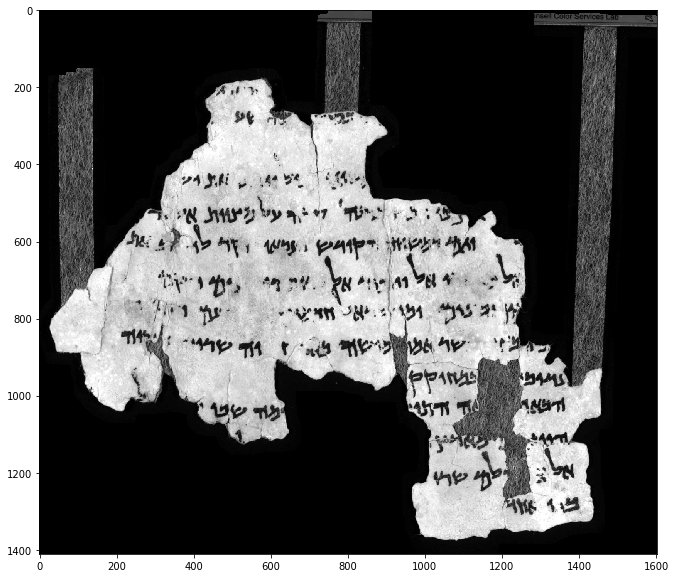

True

In [52]:
    index = '3'
    extracted_parchment = extract_parchment('image-data/test' + index + '.jpg', 100)
    plt.figure(figsize = (500,10))
    plt.imshow(extracted_parchment, cmap='gray')
    plt.show()
    cv2.imwrite('image-output/test' + index + '_extracted' + '.jpg', extracted_parchment)

In [53]:
def binarization(input):
    blured = cv2.GaussianBlur(input,(151,151),0)
#     blured = cv2.fastNlMeansDenoising(extracted_parchment, 0.1, 91, 51)    
    
    # use sauvola for binarization
    window_size = 25
    thresh_sauvola = threshold_sauvola(blured, window_size=window_size)
    binary_sauvola = extracted_parchment > thresh_sauvola
    return binary_sauvola

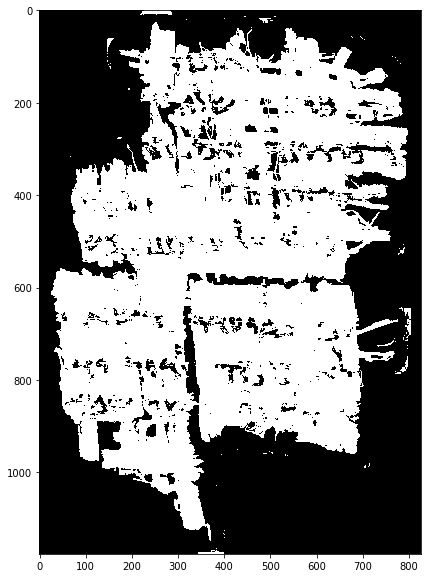

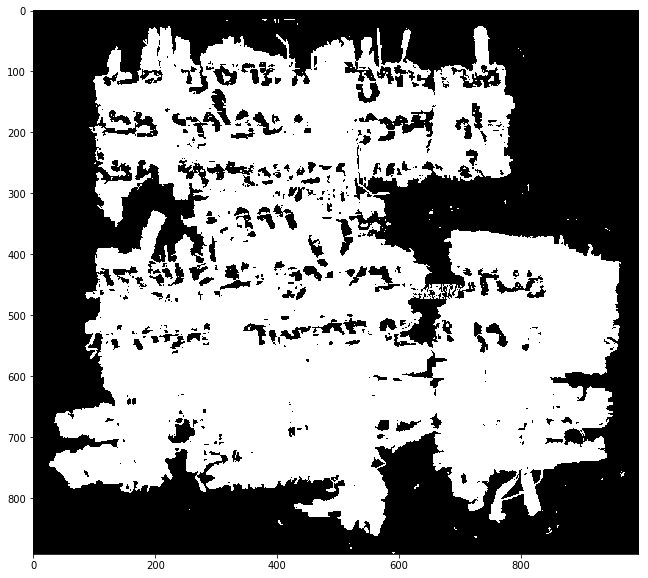

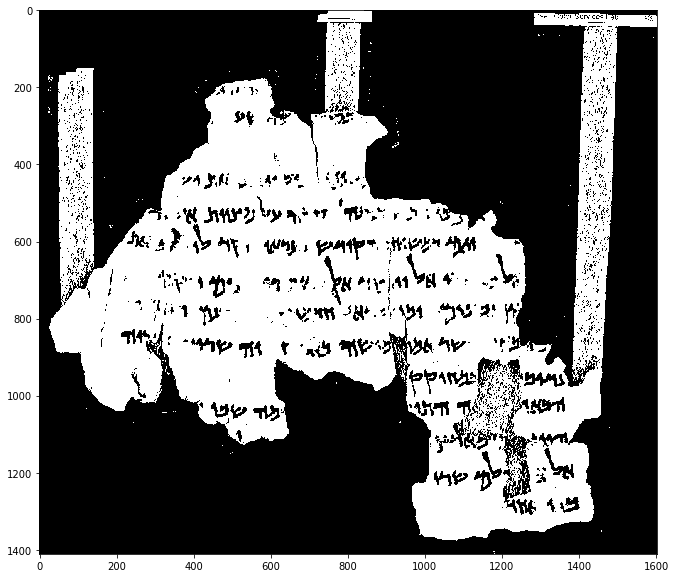

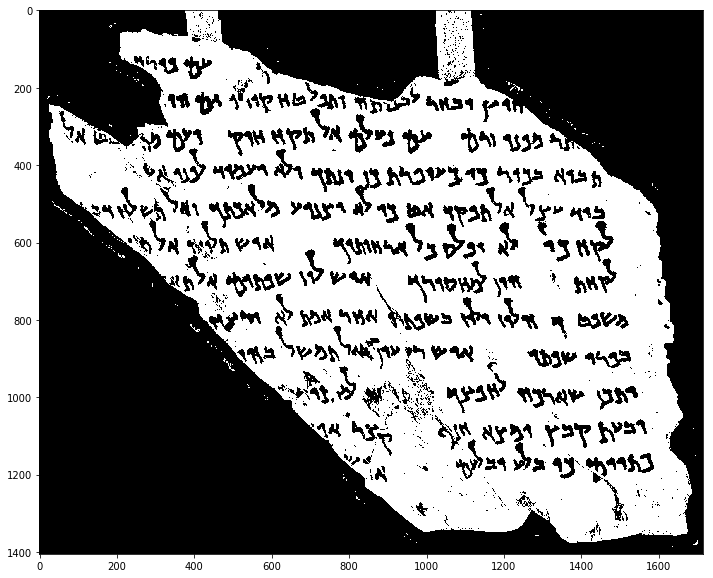

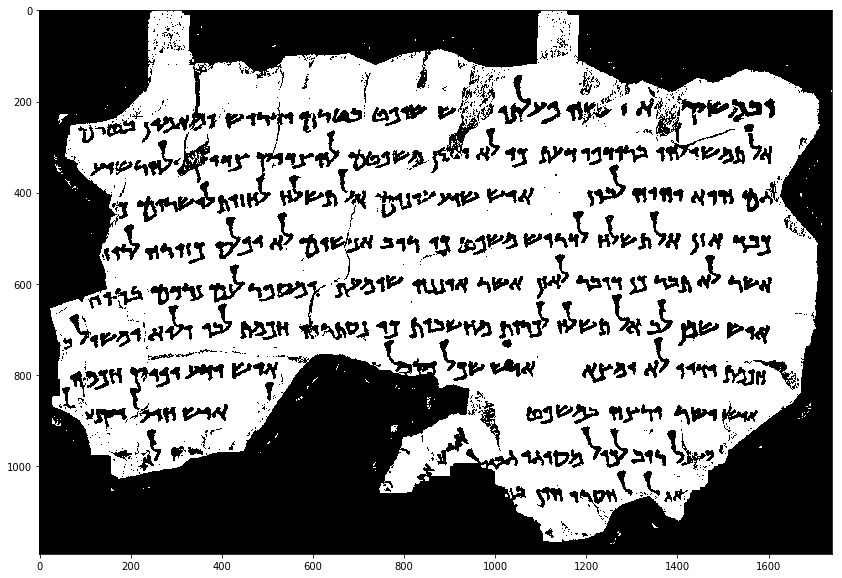

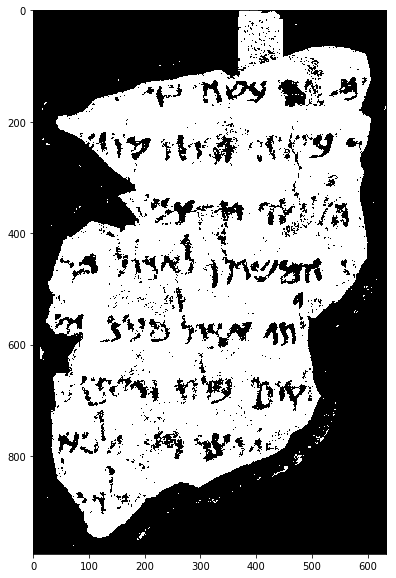

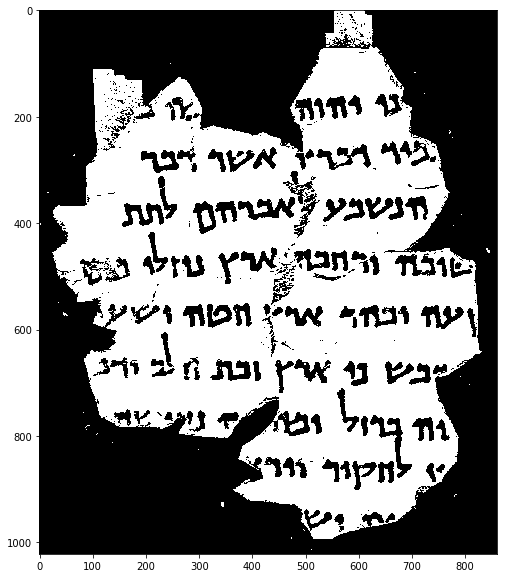

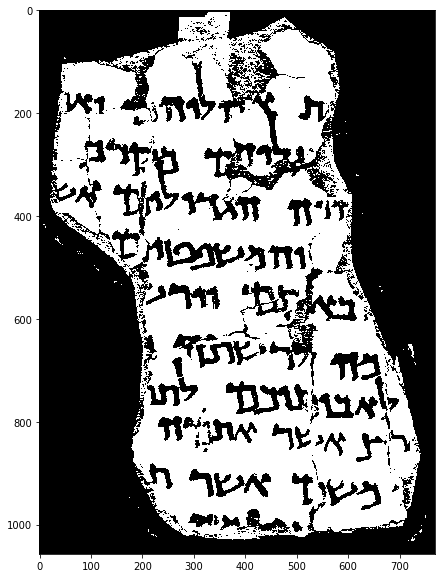

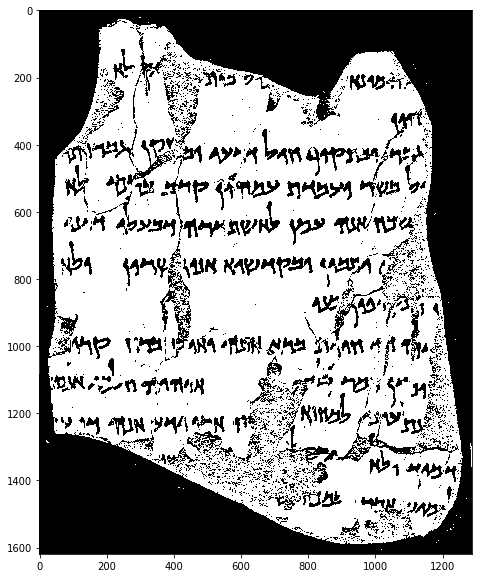

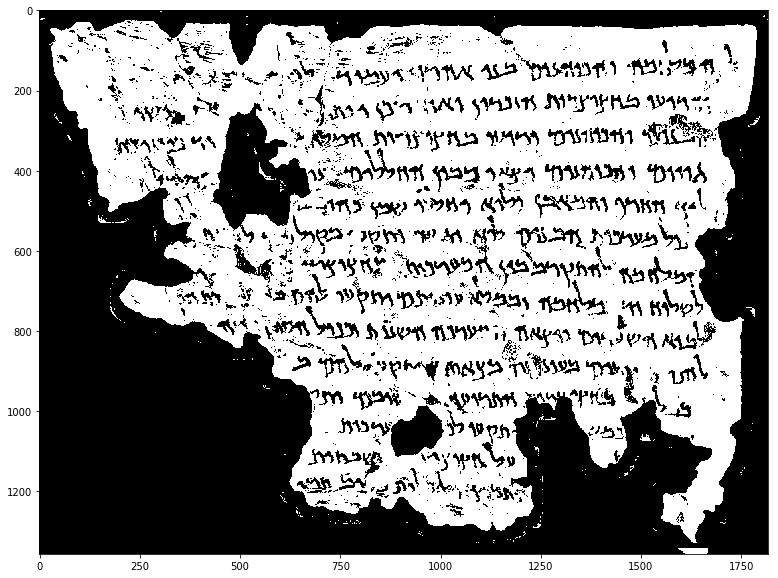

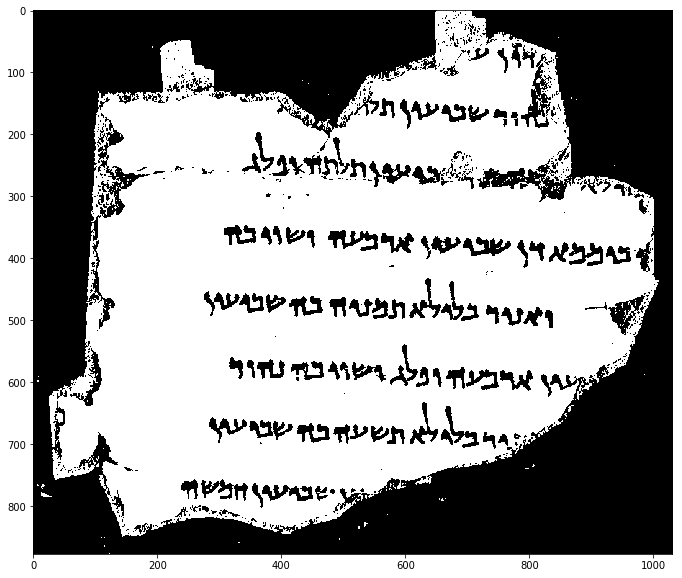

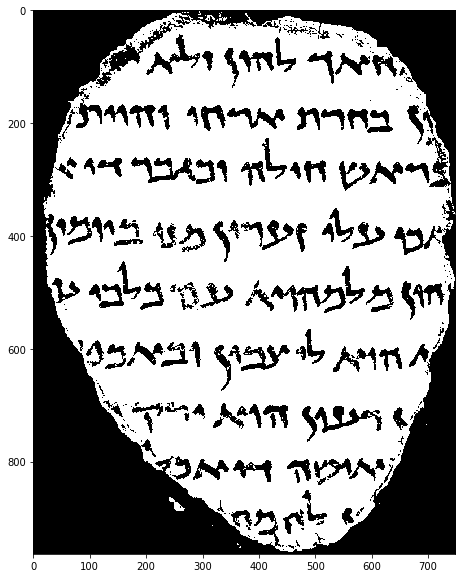

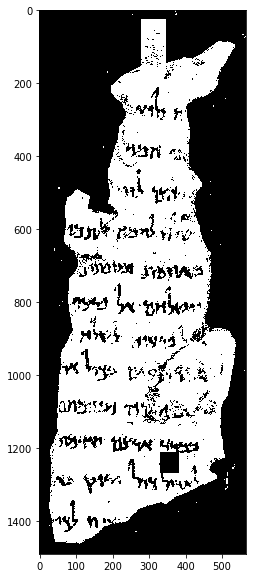

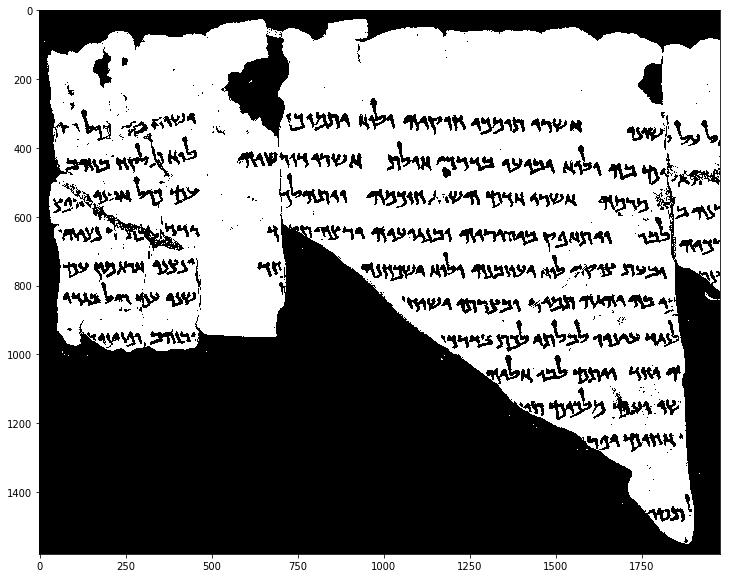

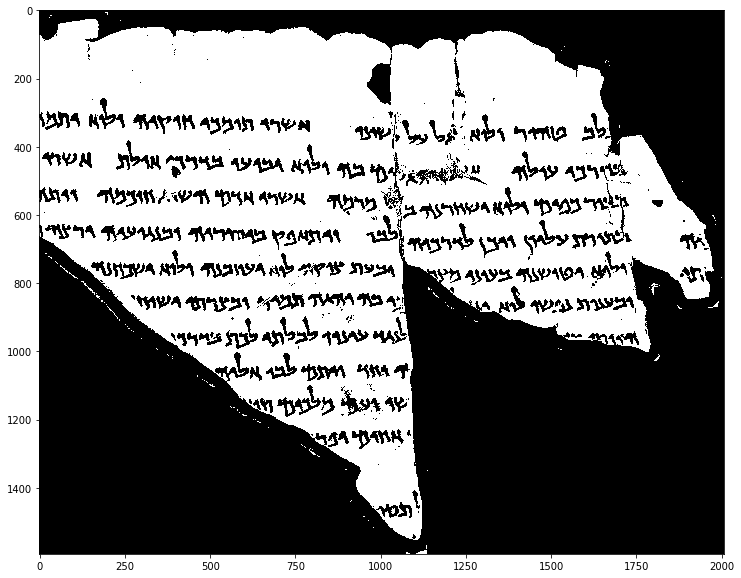

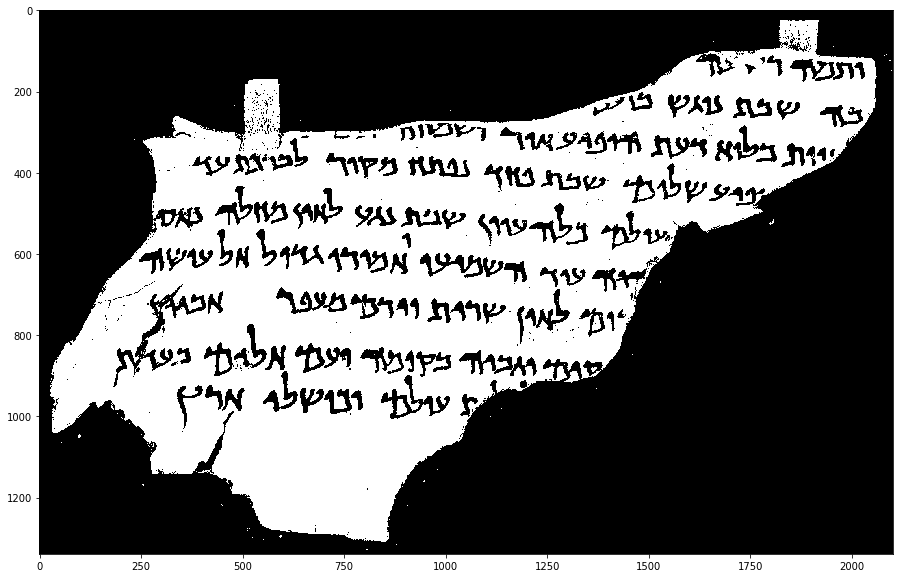

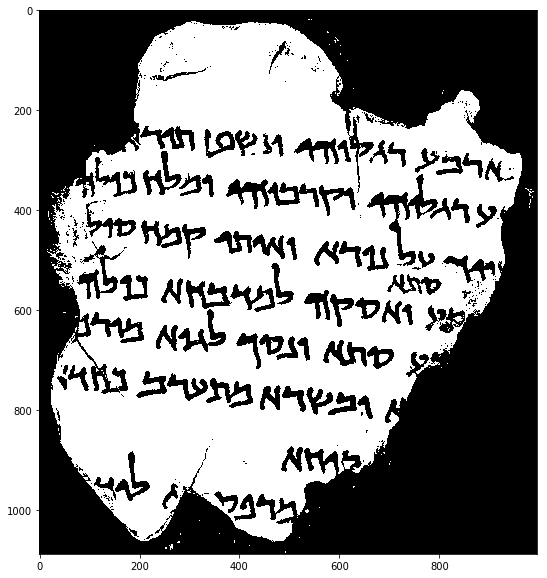

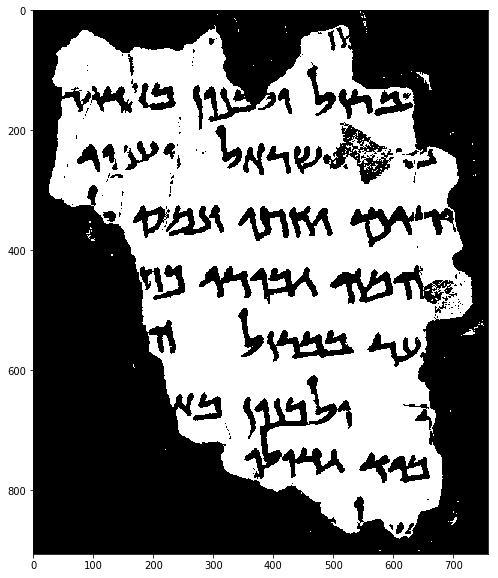

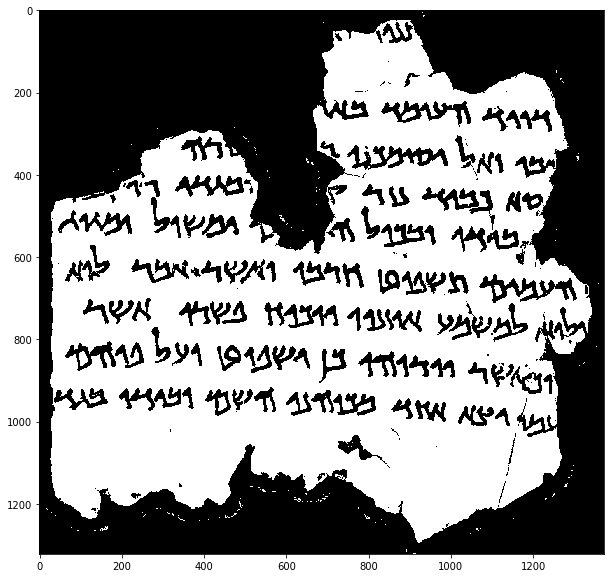

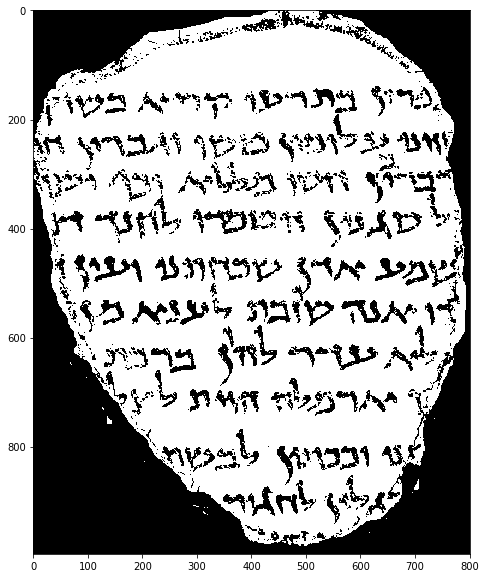

In [54]:
for i in range(20):
    index = i + 1
    if(index == 1):
        index = ''        
    index = str(index)
    extracted_parchment = extract_parchment('image-data/test' + index + '.jpg', 100)
    to_save = binarization(extracted_parchment)
    plt.figure(figsize = (500,10))
    plt.imshow(to_save, cmap='gray')
    plt.show()
    to_save.dtype='uint8'
    to_save[(to_save > 0)] = 255
    cv2.imwrite('image-output/test' + index + '_binarized' + '.jpg', to_save)
    
    # end